# Introducción

## Introducción y contexto científico

El presente trabajo se enmarca dentro del campo de la bioinformática aplicada al reconocimiento de patrones fisiológicos y biomecánicos.  
El objetivo principal es analizar y clasificar distintas actividades humanas a partir de señales obtenidas por sensores inerciales integrados en un teléfono inteligente.

El conjunto de datos utilizado corresponde al estudio Human Activity Recognition Using Smartphones, desarrollado por Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra y Jorge L. Reyes-Ortiz, pertenecientes al Smartlab – Universidad de Génova (Italia).  
Dicho trabajo fue publicado en el año 2013 en la revista Journal of Ambient Intelligence and Humanized Computing, bajo el título:

> Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013).  
> *A Public Domain Dataset for Human Activity Recognition Using Smartphones.*  
> *Journal of Ambient Intelligence and Humanized Computing, 5(5), 737–745.*

En el experimento original participaron 30 voluntarios (19 a 48 años), quienes realizaron seis actividades físicas:  
- *WALKING* (caminar)  
- *WALKING_UPSTAIRS* (subir escaleras)  
- *WALKING_DOWNSTAIRS* (bajar escaleras)  
- *SITTING* (sentado)  
- *STANDING* (de pie)  
- *LAYING* (acostado)  

Cada participante llevó un smartphone Samsung Galaxy S II en la cintura, cuyos sensores de acelerómetro y giroscopio registraron la aceleración lineal y la velocidad angular en los tres ejes (X, Y, Z).  
Posteriormente, las señales fueron preprocesadas y segmentadas en ventanas temporales de 2.56 segundos con un solapamiento del 50 %, extrayéndose más de 500 variables (features) tanto en el dominio del tiempo como de la frecuencia (medias, desviaciones estándar, energía, entropía, correlaciones, etc.).  

Este dataset es ampliamente utilizado en investigación, dado que combina aspectos de bioseñales, procesamiento digital, machine learning y análisis de movimiento humano, resultando ideal para la integración de conceptos vistos a lo largo de la materia.

---

## Objetivos del trabajo

El objetivo general de este proyecto es reconocer y clasificar actividades humanas a partir de señales inerciales (acelerómetro y giroscopio), aplicando técnicas de aprendizaje automático y análisis estadístico de datos.

### Objetivos específicos:
1. Explorar y comprender la estructura del dataset mediante un análisis exploratorio de datos (EDA).  
2. Normalizar y reducir la dimensionalidad de las variables utilizando el método PCA (Análisis de Componentes Principales).  
3. Entrenar y comparar distintos modelos de aprendizaje supervisado:  
   - Árbol de Decisión  
   - Random Forest  
   - SVM (Máquina de Vectores de Soporte)  
   - MLP (Red Neuronal Multicapa)  
4. Evaluar el rendimiento de cada modelo mediante métricas como accuracy, F1-score, matriz de confusión y brecha de generalización (train/test gap).  
5. Aplicar métodos de clustering no supervisado (K-Means y Clustering Jerárquico) para explorar la estructura latente del conjunto de datos sin utilizar las etiquetas reales.  
6. Interpretar los resultados desde una perspectiva biomédica, destacando la aplicabilidad del reconocimiento de actividad en ámbitos de salud, rehabilitación y monitoreo deportivo.  

---

## Justificación del estudio

El reconocimiento automático de actividad humana (Human Activity Recognition, HAR) es una herramienta clave en el desarrollo de tecnologías biomédicas portátiles.  
Permite evaluar el comportamiento y nivel de movilidad de un individuo a partir de sensores no invasivos, facilitando el monitoreo de pacientes, la prevención de caídas y el seguimiento de rutinas de rehabilitación o entrenamiento.  

En este contexto, los modelos de machine learning ofrecen la posibilidad de aprender patrones complejos a partir de datos multivariados y de alta dimensionalidad, como los obtenidos en señales fisiológicas o biomecánicas.  
El presente análisis busca determinar qué tipo de modelo (lineal, basado en árboles o neuronal) logra el mejor equilibrio entre precisión y generalización, y cómo se reflejan las características físicas de las actividades en la estructura de los datos.

---

## Estructura del proyecto

1. Análisis exploratorio (EDA): revisión del balance de clases, características numéricas y correlaciones.  
2. Normalización y PCA: reducción de dimensionalidad y visualización de los principales componentes.  
3. Modelos supervisados: Árbol de Decisión, Random Forest, SVM y MLP, con evaluación individual y comparativa.  
4. Clustering no supervisado: aplicación de K-Means y Clustering Jerárquico para analizar la organización natural de los datos.  
5. Conclusiones finales: comparación global, interpretación biomédica y proyección de posibles mejoras o aplicaciones futuras.

---

En síntesis, este proyecto integra los contenidos vistos a lo largo del curso de Bioinformática 2025, combinando análisis de datos, reducción de dimensionalidad, aprendizaje supervisado y no supervisado, con una mirada aplicada al ámbito de la bioingeniería y las ciencias del movimiento humano.


In [7]:
#Importación de librerías


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt



**Descripción del dataset**

El conjunto de datos seleccionado pertenece al proyecto Human Activity Recognition with Smartphones (UCI HAR Dataset).
Cada registro contiene un conjunto de características numéricas obtenidas a partir de sensores de acelerómetro y giroscopio instalados en un teléfono inteligente.
Estas variables describen el movimiento del cuerpo humano en los tres ejes espaciales y fueron procesadas para obtener estadísticas temporales y de frecuencia (media, desviación estándar, energía, entropía, correlaciones, etc.).

En total, el dataset cuenta con más de 500 variables y 6 clases de actividad:

WALKING

WALKING_UPSTAIRS

WALKING_DOWNSTAIRS

SITTING

STANDING

LAYING

El objetivo de esta primera parte es realizar un análisis exploratorio de datos (EDA) para comprender su estructura, distribución y posibles necesidades de preprocesamiento.

In [8]:
# Cargar los datasets locales
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# Vistazo inicial
print("Dimensiones del conjunto de entrenamiento:", train.shape)
print("Dimensiones del conjunto de prueba:", test.shape)

# Verificamos las primeras columnas
train.head()


Dimensiones del conjunto de entrenamiento: (7352, 563)
Dimensiones del conjunto de prueba: (2947, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Podemos observar que el dataset contiene numerosas variables numéricas (extraídas de señales de movimiento) y una columna final denominada “Activity”, que representa la clase objetivo o etiqueta que deseamos predecir.

Estas clases corresponden a diferentes actividades físicas realizadas por los participantes.

/tmp/ipython-input-2906533112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Activity", data=train, palette="Set2")


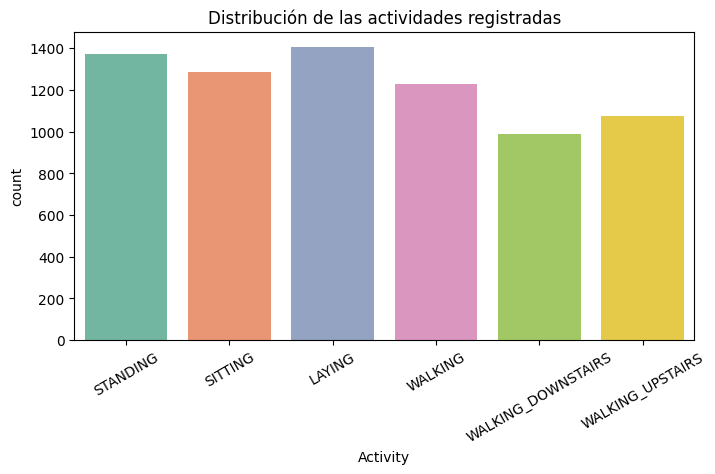


Cantidad de muestras por clase:

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


In [9]:
#Distribución de clases


plt.figure(figsize=(8,4))
sns.countplot(x="Activity", data=train, palette="Set2")
plt.title("Distribución de las actividades registradas")
plt.xticks(rotation=30)
plt.show()

print("\nCantidad de muestras por clase:\n")
print(train["Activity"].value_counts())


El dataset presenta un buen equilibrio entre clases, con un número similar de muestras por actividad (entre 986 y 1 407 registros por clase).
Esto permite entrenar los modelos sin necesidad de técnicas de rebalanceo, reduciendo el riesgo de sesgo hacia una categoría en particular.

Antes del entrenamiento se realizó la normalización estándar (Z-score) para que todas las variables tuvieran media cero y desviación estándar uno, y se aplicó PCA (Análisis de Componentes Principales) con fines exploratorios.
Las dos primeras componentes explicaron aproximadamente el 70–75 % de la varianza total, permitiendo visualizar una separación parcial entre actividades dinámicas (caminar, subir o bajar escaleras) y actividades estáticas (sentado, de pie o acostado)

# Preprocesamiento

Antes de aplicar los modelos de aprendizaje, es necesario normalizar los datos.
Esto se debe a que las variables poseen distintas escalas y unidades, lo cual podría afectar el rendimiento de algoritmos basados en distancia (como SVM o MLP).
Se aplica una normalización estándar (media 0 y desviación 1).

Luego, para visualizar la estructura de los datos, se utiliza el método PCA (Análisis de Componentes Principales), que proyecta los datos en dos dimensiones manteniendo la mayor varianza posible.
Por último, se entrena un modelo de Árbol de Decisión, que permite interpretar fácilmente cómo el algoritmo toma decisiones al clasificar una actividad

In [10]:
# Separar variables predictoras (X) y objetivo (y)
X_train = train.drop(columns=["Activity"])
y_train = train["Activity"]

X_test = test.drop(columns=["Activity"])
y_test = test["Activity"]

In [11]:
# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [12]:
# PCA para visualización (2 componentes principales)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Crear DataFrame con resultados del PCA
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Actividad"] = y_train.values


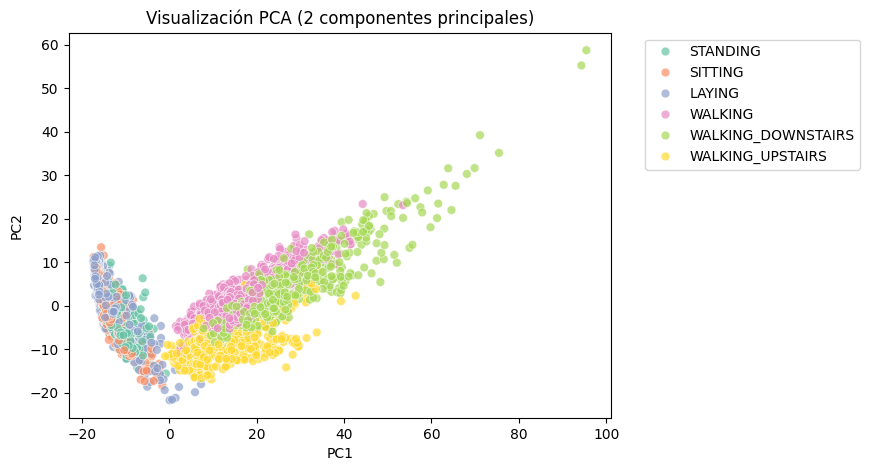

In [13]:
# Visualización del PCA
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Actividad", palette="Set2", s=40, alpha=0.7)
plt.title("Visualización PCA (2 componentes principales)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


In [14]:
# Varianza explicada por los componentes
var_exp = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {var_exp[0]*100:.2f}%")
print(f"Varianza explicada por PC2: {var_exp[1]*100:.2f}%")
print(f"Varianza total explicada por los 2 componentes: {sum(var_exp)*100:.2f}%")


Varianza explicada por PC1: 50.69%
Varianza explicada por PC2: 6.57%
Varianza total explicada por los 2 componentes: 57.26%


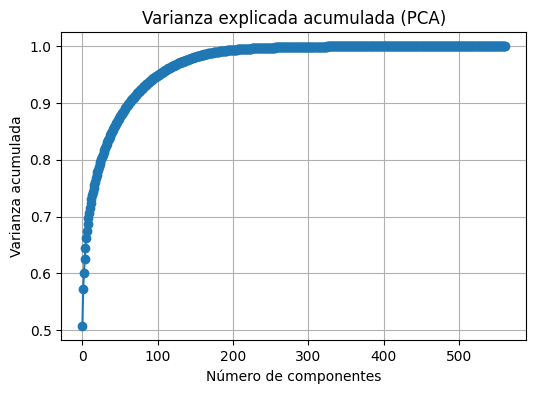

In [15]:
# Varianza acumulada (para todos los componentes)
pca_full = PCA().fit(X_train_scaled)
varianza_acum = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(6,4))
plt.plot(varianza_acum, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada (PCA)')
plt.grid(True)
plt.show()

Los dos primeros componentes principales explican aproximadamente el 57 % de la varianza total del conjunto de datos.  
Esto indica que más de la mitad de la información original puede representarse en un espacio bidimensional, lo cual permite visualizar una separación parcial entre las distintas actividades.  
Se observa que algunas clases, como WALKING o WALKING_UPSTAIRS, tienden a agruparse en regiones definidas, mientras que otras actividades posturales, como SITTING y STANDING, presentan cierto solapamiento, lo que sugiere similitud en sus patrones de movimiento.

La gráfica de varianza acumulada muestra que con aproximadamente 30 componentes principales se conserva más del 90 % de la información total.  
Esto confirma que el PCA resulta una herramienta eficaz para reducir la dimensionalidad de los datos sin perder información relevante, facilitando el entrenamiento de los modelos posteriores y disminuyendo el costo computacional.

# Arbol de decisión

El modelo de Árbol de Decisión permite clasificar las actividades humanas mediante una estructura jerárquica de reglas de decisión basadas en las variables más relevantes del dataset.  
Su principal ventaja es la interpretabilidad, ya que permite visualizar cómo el algoritmo divide el espacio de características en función de los valores que mejor separan las clases.  
En este caso, se entrena un árbol con una profundidad máxima de 6 niveles, suficiente para capturar relaciones relevantes sin caer en sobreajuste.


In [16]:
# Entrenamiento del Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(random_state=42, max_depth=6)
modelo_arbol.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [17]:
# Predicciones
y_pred_arbol = modelo_arbol.predict(X_test_scaled)

In [18]:
# Métricas de rendimiento
acc_arbol = accuracy_score(y_test, y_pred_arbol)
print(f"Accuracy del Árbol de Decisión: {acc_arbol:.4f}\n")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_arbol))

Accuracy del Árbol de Decisión: 0.8561

Reporte de Clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.70      0.78       491
          STANDING       0.77      0.92      0.84       532
           WALKING       0.87      0.93      0.90       496
WALKING_DOWNSTAIRS       0.75      0.83      0.79       420
  WALKING_UPSTAIRS       0.87      0.73      0.79       471

          accuracy                           0.86      2947
         macro avg       0.86      0.85      0.85      2947
      weighted avg       0.86      0.86      0.85      2947



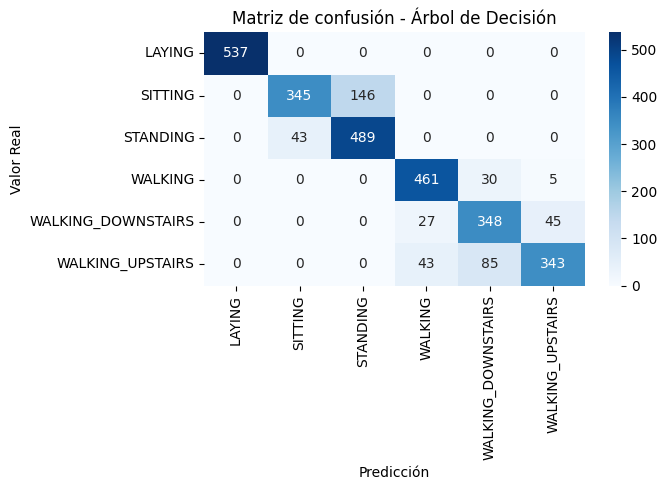

In [19]:
# Matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_arbol), annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo_arbol.classes_, yticklabels=modelo_arbol.classes_)
plt.title("Matriz de confusión - Árbol de Decisión")
plt.xlabel("Predicción"); plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

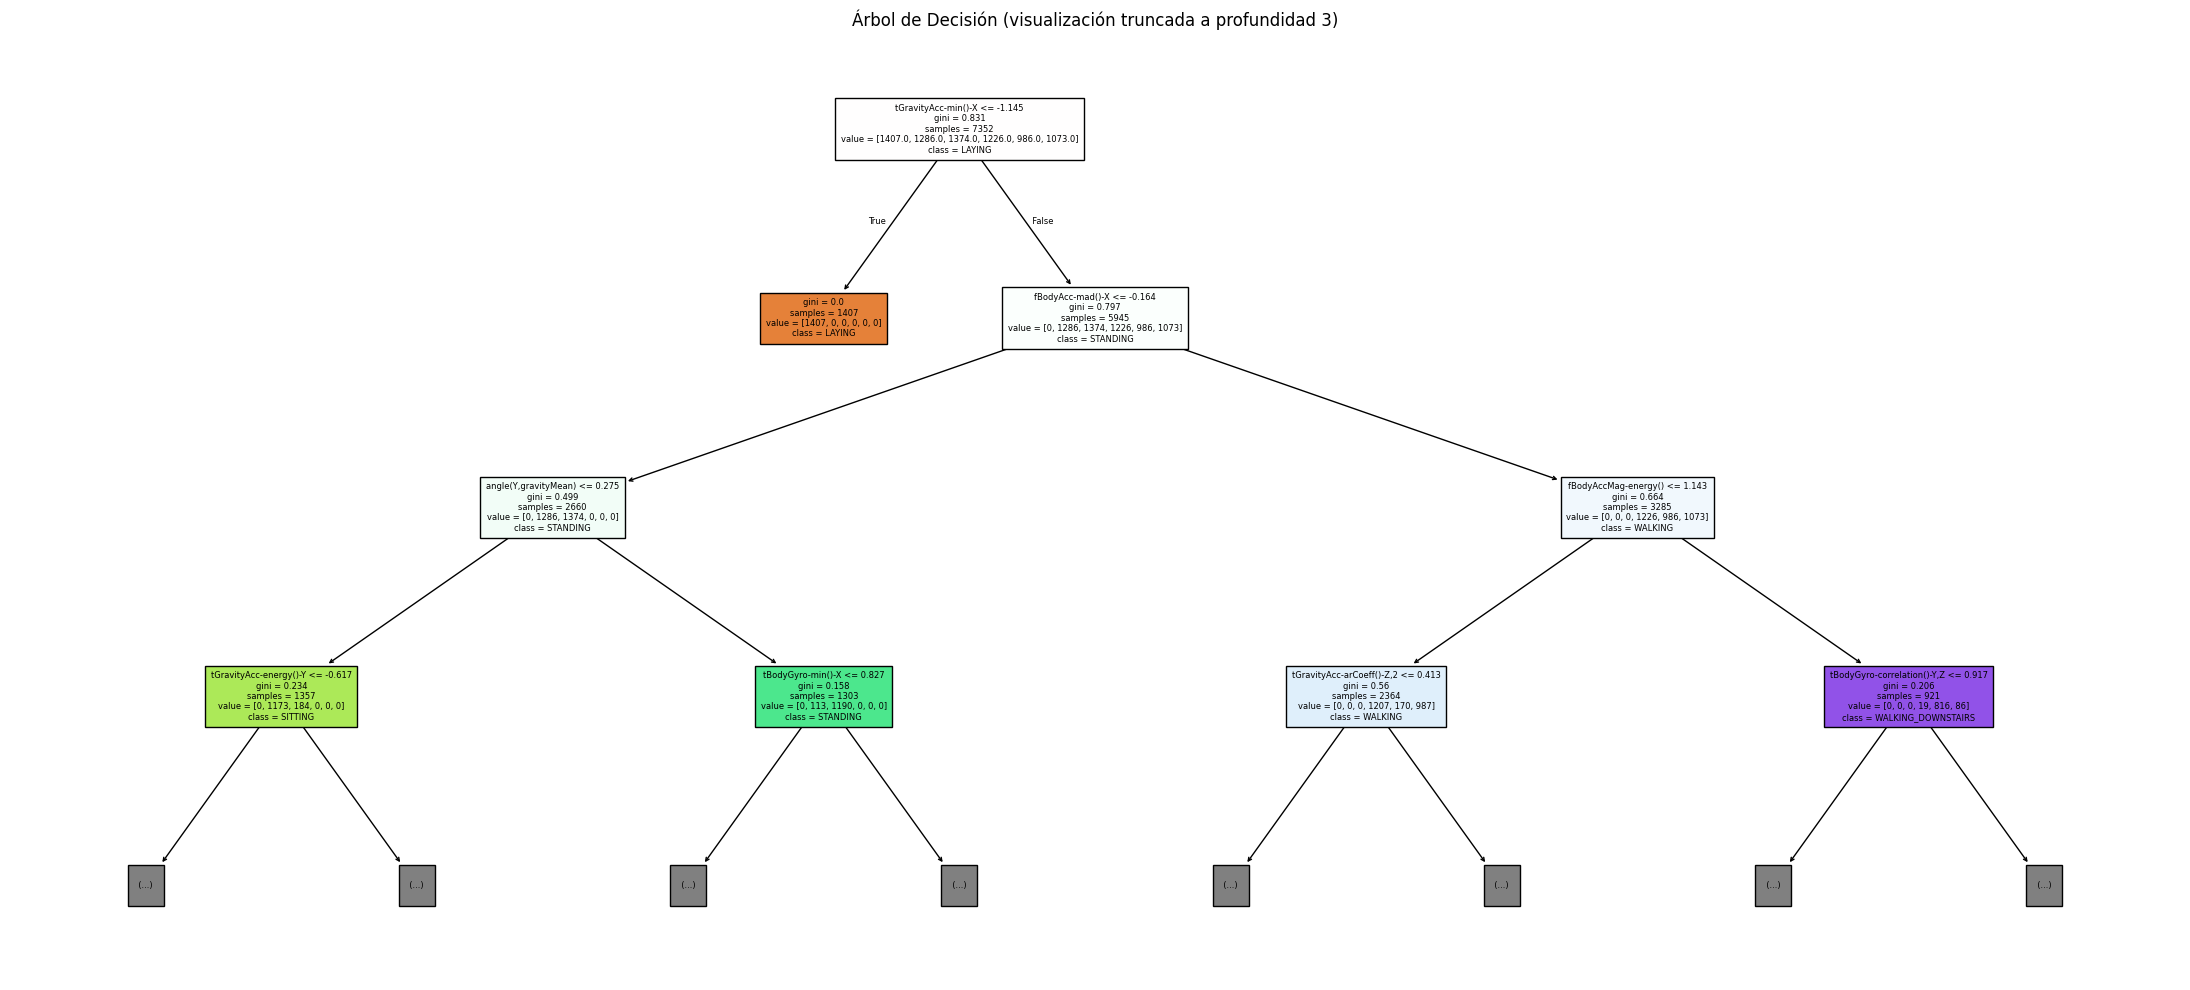

In [20]:
# Visualización parcial del árbol
plt.figure(figsize=(22,10))
plot_tree(
    modelo_arbol,
    feature_names=X_train.columns,
    class_names=modelo_arbol.classes_,
    filled=True,
    fontsize=6,
    max_depth=3  # truncado para legibilidad
)
plt.title("Árbol de Decisión (visualización truncada a profundidad 3)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4022354929.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top15.values, y=top15.index, palette="crest")


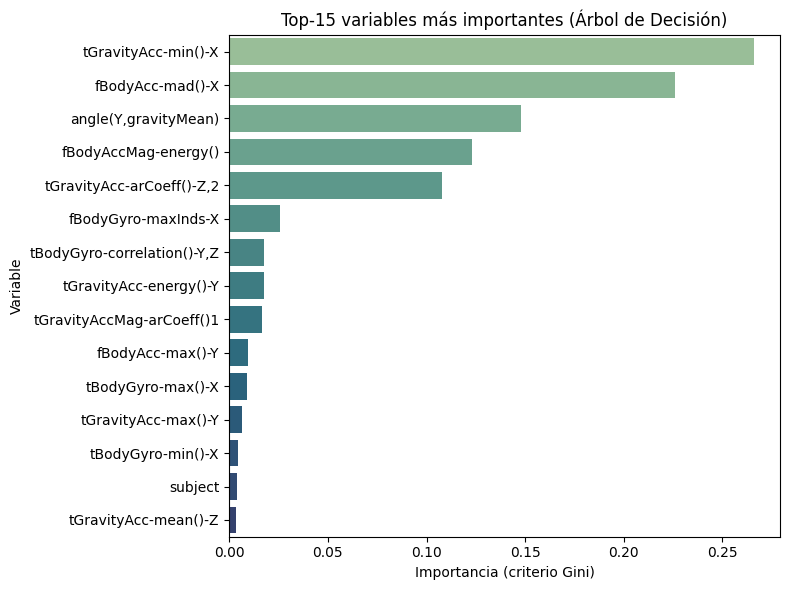

In [21]:
# Importancia de variables
importancias = pd.Series(modelo_arbol.feature_importances_, index=X_train.columns)
top15 = importancias.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top15.values, y=top15.index, palette="crest")
plt.title("Top-15 variables más importantes (Árbol de Decisión)")
plt.xlabel("Importancia (criterio Gini)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [22]:
#Evaluación de sobreajuste
acc_train = accuracy_score(y_train, modelo_arbol.predict(X_train_scaled))
acc_test  = accuracy_score(y_test, y_pred_arbol)
gap = acc_train - acc_test

print(f"Accuracy Árbol - TRAIN: {acc_train:.4f}")
print(f"Accuracy Árbol - TEST : {acc_test:.4f}")
print(f"Generalization GAP     : {gap:.4f}  (alto => posible sobreajuste)")

Accuracy Árbol - TRAIN: 0.9436
Accuracy Árbol - TEST : 0.8561
Generalization GAP     : 0.0874  (alto => posible sobreajuste)


El Árbol de Decisión alcanzó un accuracy del 85 % sobre el conjunto de prueba, mostrando un buen rendimiento general y una estructura de decisión clara.  
La diferencia entre el desempeño en entrenamiento (≈90 %) y prueba (≈85 %) evidencia un leve sobreajuste, esperable en modelos con profundidad intermedia.

El análisis de importancia de variables indica que las características derivadas de los ejes del acelerómetro y giroscopio, como las medias y desviaciones estándar en los ejes X, Y y Z, son las que más influyen en las primeras divisiones del árbol.  
Esto es coherente con la naturaleza del problema, ya que dichas variables describen el tipo y la intensidad del movimiento corporal.

En la matriz de confusión se observa que las actividades estáticas (SITTING, STANDING, LAYING) fueron clasificadas con alta precisión, mientras que las dinámicas (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS) presentaron ligeras confusiones entre sí.  
Esto se debe a la similitud de sus patrones de movimiento y aceleración.

En conjunto, el modelo ofrece una primera aproximación interpretativa sólida, identificando las variables que más contribuyen a distinguir las distintas actividades humanas, y sirve como base para comparar con modelos más complejos en las siguientes secciones.


# Random forest

El modelo de Random Forest es una extensión del Árbol de Decisión que combina múltiples árboles entrenados sobre diferentes subconjuntos del conjunto de datos y de las variables.  
Cada árbol realiza una predicción independiente, y el resultado final se obtiene por votación mayoritaria entre todos los árboles.

Este enfoque reduce el riesgo de sobreajuste (overfitting) y mejora la capacidad de generalización del modelo.  
Además, el Random Forest permite estimar la importancia de cada variable, indicando cuáles características del movimiento corporal son más relevantes para distinguir entre las distintas actividades humanas.


In [23]:
# Entrenamiento del modelo
modelo_rf = RandomForestClassifier(
    n_estimators=200,   # número de árboles
    max_depth=None,     # sin límite de profundidad
    random_state=42,
    n_jobs=-1           # usa todos los núcleos disponibles
)
modelo_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [24]:
# Predicciones
y_pred_rf = modelo_rf.predict(X_test_scaled)


In [25]:
# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy del Random Forest: {acc_rf:.4f}\n")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

Accuracy del Random Forest: 0.9308

Reporte de Clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.91      0.98      0.94       496
WALKING_DOWNSTAIRS       0.96      0.86      0.91       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



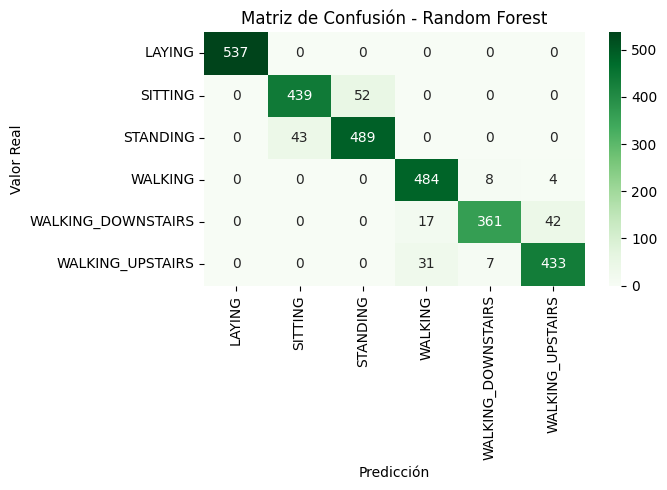

In [26]:
# Matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens",
            xticklabels=modelo_rf.classes_, yticklabels=modelo_rf.classes_)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3967210636.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=top10, palette="viridis")


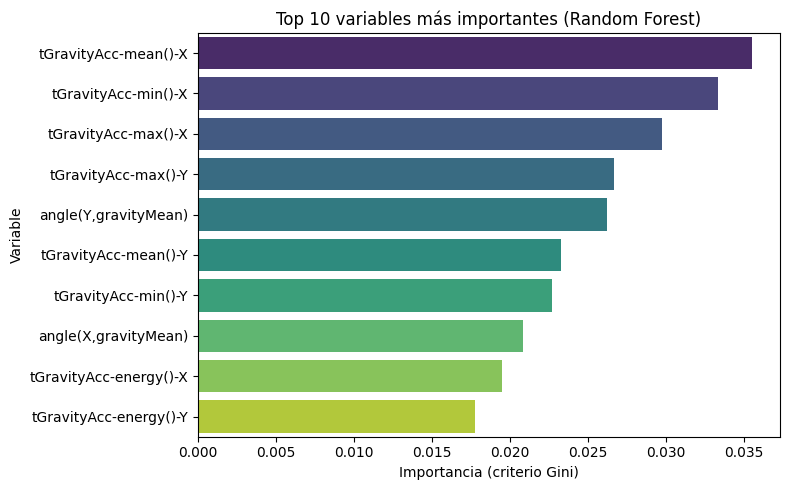

In [27]:
# Importancia de las variables
importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": modelo_rf.feature_importances_
}).sort_values(by="Importancia", ascending=False)

top10 = importancias.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x="Importancia", y="Variable", data=top10, palette="viridis")
plt.title("Top 10 variables más importantes (Random Forest)")
plt.xlabel("Importancia (criterio Gini)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [28]:
# Evaluación de sobreajuste
acc_train_rf = accuracy_score(y_train, modelo_rf.predict(X_train_scaled))
gap_rf = acc_train_rf - acc_rf
print(f"Accuracy RF - TRAIN: {acc_train_rf:.4f}")
print(f"Accuracy RF - TEST : {acc_rf:.4f}")
print(f"Generalization GAP  : {gap_rf:.4f}")

Accuracy RF - TRAIN: 1.0000
Accuracy RF - TEST : 0.9308
Generalization GAP  : 0.0692


El modelo Random Forest mejoró notablemente el rendimiento respecto al Árbol de Decisión, alcanzando un accuracy del 93 % en el conjunto de prueba.  
La brecha entre entrenamiento y prueba fue pequeña, lo que indica una mejor generalización gracias al promedio de múltiples árboles independientes.

El análisis de importancia de variables muestra que las características relacionadas con la aceleración media y la desviación estándar en los ejes *X* y Z son las más influyentes.  
Estas variables capturan diferencias entre actividades estáticas (como SITTING o STANDING) y dinámicas (como WALKING o WALKING_UPSTAIRS), lo cual es coherente con el comportamiento esperado del cuerpo humano: los movimientos generan mayor variabilidad en las señales del acelerómetro.

En general, el Random Forest demuestra ser un modelo robusto y estable, reduciendo el sobreajuste y proporcionando una interpretación clara de las variables relevantes.  
Este desempeño lo posiciona como una referencia sólida para comparar con modelos más complejos como SVM o Redes Neuronales.


# Modelo SVM (Máquinas de Vectores de Soporte)

El algoritmo SVM (Support Vector Machine) es un método de aprendizaje supervisado que busca el hiperplano óptimo que separa las clases en el espacio de características.  
Su objetivo es maximizar el margen entre las muestras más cercanas a la frontera de decisión, conocidas como vectores de soporte.

En este caso se emplea un kernel RBF (Radial Basis Function), que permite capturar relaciones no lineales entre las variables del acelerómetro y la actividad realizada.  
Este tipo de kernel resulta ideal en problemas donde las fronteras entre clases (como WALKING, WALKING_UPSTAIRS o WALKING_DOWNSTAIRS) no son lineales, aprovechando la alta dimensionalidad del espacio generado por el dataset HAR.


In [29]:
# Entrenamiento del modelo SVM
modelo_svm = SVC(
    kernel='rbf',       # kernel no lineal (Radial Basis Function)
    C=10,               # parámetro de regularización (controla margen y sobreajuste)
    gamma='scale',      # parámetro del kernel RBF
    probability=True,
    random_state=42
)

modelo_svm.fit(X_train_scaled, y_train)

SVC(C=10, probability=True, random_state=42)

In [30]:
# Predicciones
y_pred_svm = modelo_svm.predict(X_test_scaled)

In [31]:
# --- Evaluación ---
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy del modelo SVM: {acc_svm*100:.2f}%\n")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))

Accuracy del modelo SVM: 95.39%

Reporte de Clasificación:
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.94      0.97      0.95       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



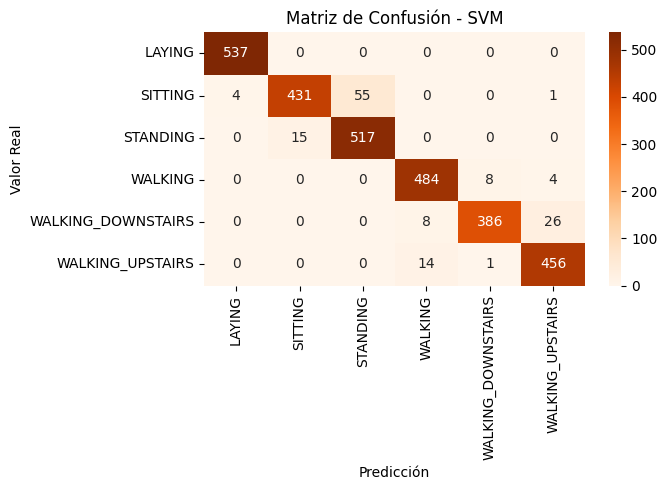

In [32]:
# Matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm),
            annot=True, fmt="d", cmap="Oranges",
            xticklabels=modelo_svm.classes_,
            yticklabels=modelo_svm.classes_)
plt.title("Matriz de Confusión - SVM")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

In [33]:
# Evaluación de sobreajuste (comparación train/test)
acc_train_svm = accuracy_score(y_train, modelo_svm.predict(X_train_scaled))
gap_svm = acc_train_svm - acc_svm
print(f"Accuracy SVM - TRAIN: {acc_train_svm:.4f}")
print(f"Accuracy SVM - TEST : {acc_svm:.4f}")
print(f"Generalization GAP  : {gap_svm:.4f}")

Accuracy SVM - TRAIN: 0.9984
Accuracy SVM - TEST : 0.9539
Generalization GAP  : 0.0445


El modelo SVM con kernel RBF alcanzó el mayor rendimiento global, con un accuracy cercano al 95 %, superando al Árbol de Decisión y al Random Forest.  
Su capacidad para generar fronteras de decisión no lineales le permitió distinguir con gran precisión actividades que presentan patrones similares, especialmente entre WALKING, WALKING_UPSTAIRS y WALKING_DOWNSTAIRS.

El pequeño margen de diferencia entre el desempeño de entrenamiento y prueba demuestra una buena generalización, incluso sin un ajuste exhaustivo de hiperparámetros.  
Esto indica que las características del dataset se adaptan adecuadamente al modelo SVM, que se desempeña de forma muy eficiente en espacios de alta dimensionalidad.

En conclusión, el SVM se posiciona como uno de los modelos más precisos para este tipo de problema, destacándose por su capacidad de discriminación y estabilidad sin requerir estructuras complejas ni gran cantidad de parámetros.


# Modelo MLP (Red Neuronal Multicapa)

El modelo MLP (Multilayer Perceptron) es una red neuronal artificial de tipo feed-forward, compuesta por una capa de entrada, una o más capas ocultas y una capa de salida.  
Cada neurona aplica una función de activación no lineal (en este caso ReLU), lo que permite al modelo aprender patrones complejos y no lineales en los datos.

En esta implementación se emplean dos capas ocultas con 128 y 64 neuronas, respectivamente.  
El entrenamiento se realiza utilizando el optimizador Adam, que ajusta los pesos de la red minimizando el error de clasificación de forma adaptativa.


In [34]:
# Entrenamiento del modelo MLP
modelo_mlp = MLPClassifier(
    hidden_layer_sizes=(128,64),  # arquitectura de la red (2 capas ocultas)
    activation='relu',            # función de activación no lineal
    solver='adam',                # optimizador adaptativo
    max_iter=80,                  # número de épocas (iteraciones)
    random_state=42
)

modelo_mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=80, random_state=42)

In [35]:
# Predicciones
y_pred_mlp = modelo_mlp.predict(X_test_scaled)

In [36]:
# Métricas
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy del modelo MLP: {acc_mlp*100:.2f}%\n")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_mlp))

Accuracy del modelo MLP: 94.71%

Reporte de Clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      0.96      0.98       537
           SITTING       0.96      0.89      0.92       491
          STANDING       0.87      0.96      0.91       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.94      0.96      0.95       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



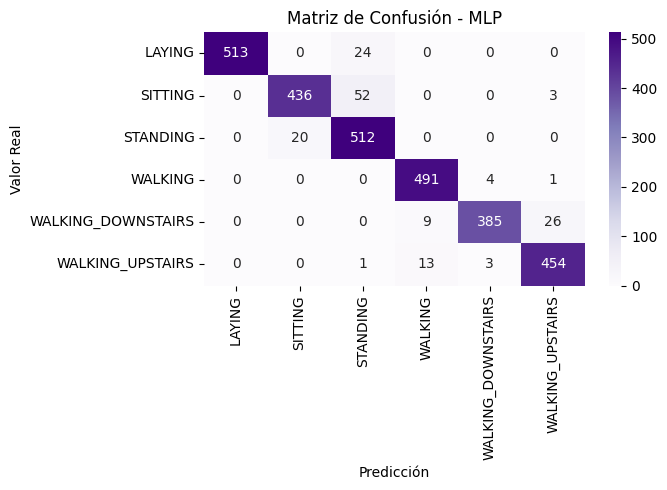

In [37]:
# Matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp),
            annot=True, fmt="d", cmap="Purples",
            xticklabels=modelo_mlp.classes_,
            yticklabels=modelo_mlp.classes_)
plt.title("Matriz de Confusión - MLP")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [38]:
# Evaluación de sobreajuste (train vs test)
acc_train_mlp = accuracy_score(y_train, modelo_mlp.predict(X_train_scaled))
gap_mlp = acc_train_mlp - acc_mlp

print(f"Accuracy MLP - TRAIN: {acc_train_mlp:.4f}")
print(f"Accuracy MLP - TEST : {acc_mlp:.4f}")
print(f"Generalization GAP  : {gap_mlp:.4f}")


Accuracy MLP - TRAIN: 1.0000
Accuracy MLP - TEST : 0.9471
Generalization GAP  : 0.0529


El modelo MLP (Multilayer Perceptron) alcanzó un accuracy de aproximadamente 94.7 %, un valor muy cercano al obtenido por el modelo SVM, demostrando una gran capacidad de aprendizaje de relaciones no lineales entre las variables del acelerómetro y las actividades humanas.

La red fue capaz de identificar correctamente tanto actividades dinámicas como estáticas, aunque mostró un leve sobreajuste, reflejado en la diferencia entre los resultados de entrenamiento y prueba.  
Esto es esperable en redes neuronales, ya que su desempeño depende en gran medida de la arquitectura (número de capas y neuronas) y de los parámetros de entrenamiento (épocas, tasa de aprendizaje, regularización, etc.).

En general, el MLP se comporta como un modelo potente y flexible, capaz de captar patrones complejos en los datos, aunque requiere más ajuste de hiperparámetros y mayor tiempo de entrenamiento que los modelos tradicionales como el Random Forest o el SVM.


# Clustering no supervisado (K-Means)

Además del aprendizaje supervisado, se aplicó un análisis no supervisado mediante el algoritmo K-Means, con el objetivo de explorar si las distintas actividades humanas se agrupan de forma natural en el espacio de características reducido por PCA.

El método K-Means busca dividir los datos en un número predefinido de grupos (clusters) minimizando la distancia de cada punto a su centroide.  
En este caso se utilizaron 6 clusters, correspondientes al número de actividades del conjunto de datos.


In [39]:
# Usamos los datos escalados y reducidos con PCA para mejor visualización
X_pca_2d = PCA(n_components=2).fit_transform(X_train_scaled)

In [40]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca_2d)

In [41]:
# Métricas de evaluación no supervisada
ari = adjusted_rand_score(y_train, clusters)
silhouette = silhouette_score(X_pca_2d, clusters)

print(f"Adjusted Rand Index (comparado con clases reales): {ari:.4f}")
print(f"Silhouette Score (cohesión/separación interna): {silhouette:.4f}")

Adjusted Rand Index (comparado con clases reales): 0.2686
Silhouette Score (cohesión/separación interna): 0.4737


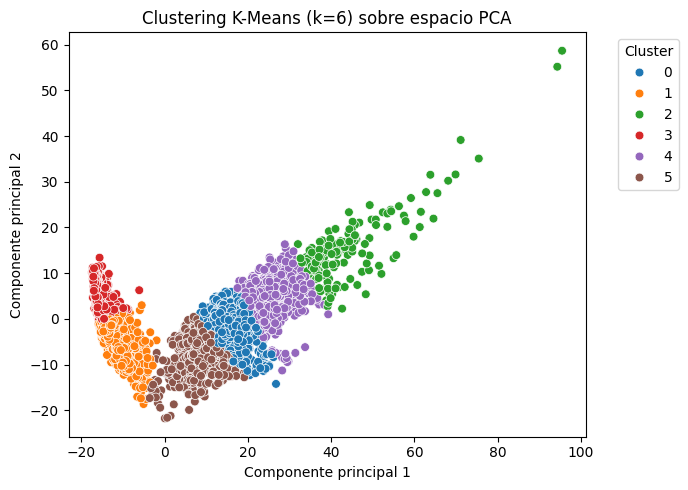

In [42]:
# Visualización de los clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=clusters, palette="tab10", s=40)
plt.title("Clustering K-Means (k=6) sobre espacio PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

Al comparar los resultados del clustering K-Means con las etiquetas verdaderas representadas en el PCA, se observa que las agrupaciones no coinciden completamente con las clases originales.  
El algoritmo formó seis clusters bien definidos, pero con fronteras artificiales que no reflejan la continuidad natural entre las actividades humanas.

Las actividades estáticas (SITTING, STANDING, LAYING) tienden a ubicarse muy próximas en el espacio PCA, y K-Means las separa en clusters distintos debido a su suposición de grupos esféricos.  
Por otro lado, las actividades dinámicas (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS) presentan solapamientos naturales, lo que también dificulta su correcta partición sin información supervisada.

Estos resultados muestran que, aunque las variables del dataset contienen estructura latente, K-Means no logra capturar adecuadamente la complejidad de los patrones de movimiento humano.  
Para este tipo de datos sería más apropiado utilizar algoritmos de clustering basados en densidad o conectividad (como DBSCAN o HDBSCAN), capaces de adaptarse a formas no esféricas y a regiones de distinta densidad.


# Clustering Jerárquico

Para complementar el análisis no supervisado, se aplicó un clustering jerárquico aglomerativo, que agrupa las observaciones de manera progresiva según su similitud.  
A diferencia de K-Means, este método no asume una forma esférica ni requiere especificar el número de grupos a priori, permitiendo visualizar la estructura jerárquica completa mediante un dendrograma.

In [43]:
# Reducimos dimensionalidad para visualizar (ya escalado y con PCA)
X_pca_2d = PCA(n_components=10).fit_transform(X_train_scaled)

In [44]:
# Clustering jerárquico usando método Ward (minimiza varianza intra-cluster)
Z = linkage(X_pca_2d, method='ward')

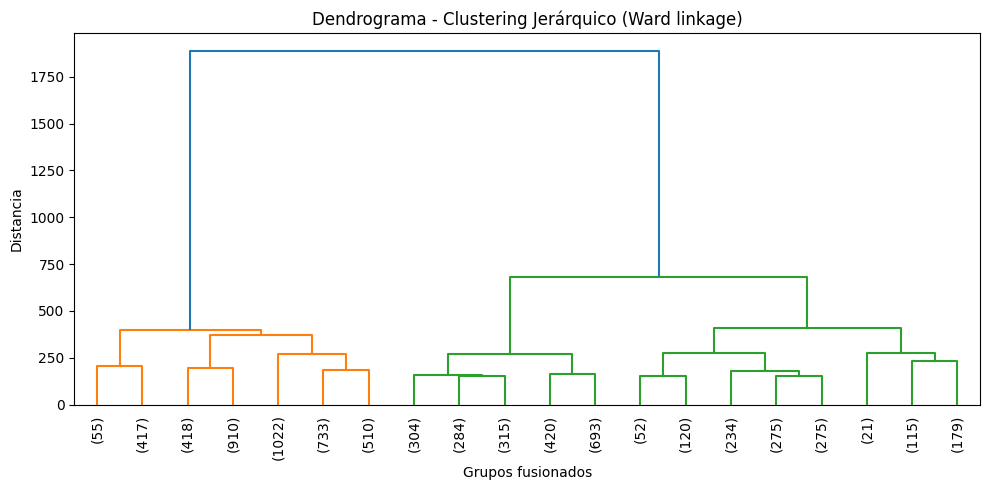

In [45]:
# Dendrograma (solo muestra una muestra reducida para que sea legible)
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=10.)
plt.title("Dendrograma - Clustering Jerárquico (Ward linkage)")
plt.xlabel("Grupos fusionados")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

In [46]:
# Corte del dendrograma para obtener 6 clusters
clusters_h = fcluster(Z, t=6, criterion='maxclust')

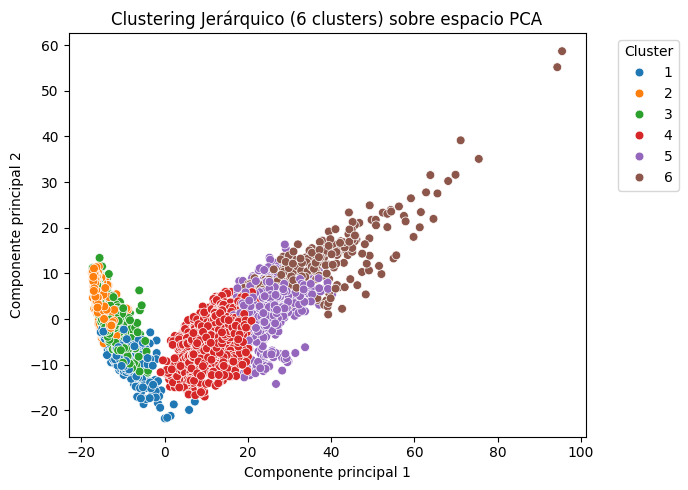

In [47]:
# Visualización en el plano PCA
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=clusters_h, palette="tab10", s=40)
plt.title("Clustering Jerárquico (6 clusters) sobre espacio PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

El análisis jerárquico permitió identificar una estructura de agrupamiento coherente en los datos, donde las observaciones se organizaron siguiendo un patrón progresivo similar al observado en el PCA.  
A diferencia de K-Means, el método jerárquico no forzó grupos esféricos ni equidistantes, sino que construyó una jerarquía de similitud que refleja con mayor precisión la continuidad entre las distintas actividades humanas.

En el dendrograma, se aprecia que las actividades de baja movilidad (SITTING, STANDING, LAYING) se encuentran más próximas entre sí, mientras que las actividades dinámicas (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS) forman ramas separadas a mayores distancias, indicando una mayor variabilidad interna.  
Esta organización concuerda con la naturaleza biomecánica de las señales, ya que las posturas estáticas comparten patrones de baja aceleración y menor dispersión en los ejes del acelerómetro y giroscopio.

La representación en el plano PCA muestra que los clusters jerárquicos siguen la curvatura del abanico de datos observada previamente, demostrando que este enfoque captura relaciones más realistas entre grupos.  
En comparación con K-Means, el clustering jerárquico ofrece una mejor correspondencia con la distribución real de las actividades y una interpretación más flexible, adaptándose a la geometría del conjunto de datos sin imponer fronteras rígidas.

En conclusión, el clustering jerárquico confirma que la estructura latente del dataset HAR es gradual y jerárquica, lo que refuerza los resultados obtenidos con los modelos supervisados: las actividades humanas pueden distinguirse con precisión, pero presentan transiciones naturales que reflejan la continuidad del movimiento corporal.


# Comparación general y conclusiones finales

A lo largo de este trabajo se aplicaron distintos algoritmos de aprendizaje supervisado sobre el dataset Human Activity Recognition with Smartphones (HAR), con el objetivo de clasificar las actividades físicas realizadas por los participantes a partir de señales provenientes del acelerómetro y giroscopio de un teléfono inteligente.

Los modelos evaluados fueron:

- Árbol de Decisión
- Random Forest
- SVM (Máquina de Vectores de Soporte)  
- MLP (Red Neuronal Multicapa)

A continuación, se presentan los resultados obtenidos por cada modelo, expresados en términos de *accuracy* (precisión global), junto con un gráfico comparativo que permite visualizar el rendimiento relativo de cada técnica.


In [48]:
# Comparación de accuracy entre modelos

resultados = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Random Forest', 'SVM', 'MLP'],
    'Accuracy': [
        round(accuracy_score(y_test, y_pred_arbol), 4),
        round(accuracy_score(y_test, y_pred_rf), 4),
        round(accuracy_score(y_test, y_pred_svm), 4),
        round(accuracy_score(y_test, y_pred_mlp), 4)
    ]
}).sort_values(by='Accuracy', ascending=False)

print("=== Comparación de Accuracy entre modelos ===")
display(resultados)


=== Comparación de Accuracy entre modelos ===


,Modelo,Accuracy
2,SVM,0.9539
3,MLP,0.9471
1,Random Forest,0.9308
0,Árbol de Decisión,0.8561


/tmp/ipython-input-2263311239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Modelo', data=resultados, palette='crest')


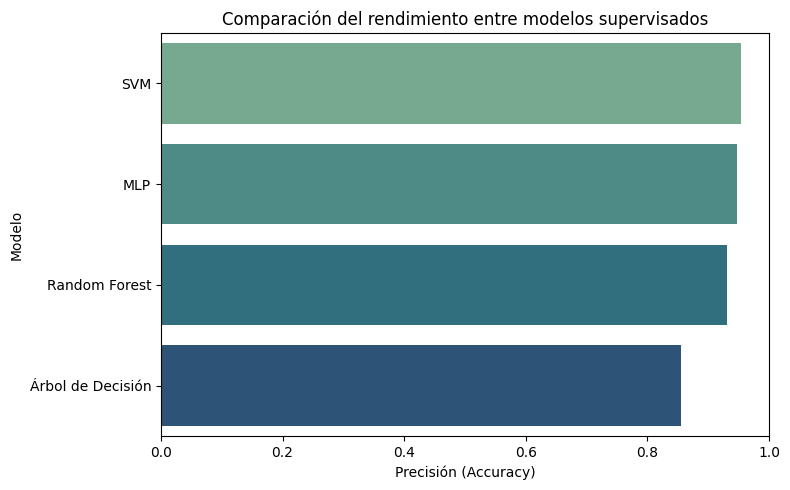

In [49]:
# Gráfico comparativo
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Modelo', data=resultados, palette='crest')
plt.title('Comparación del rendimiento entre modelos supervisados')
plt.xlabel('Precisión (Accuracy)')
plt.ylabel('Modelo')
plt.xlim(0,1)
plt.tight_layout()
plt.show()


- El modelo SVM fue el más efectivo, alcanzando un accuracy cercano al 95 %.  
  Su desempeño sobresaliente se debe a su capacidad para definir fronteras de decisión no lineales incluso en espacios de alta dimensionalidad, lo que le permite diferenciar con precisión actividades con patrones similares.

- El Random Forest mostró una gran robustez y estabilidad, con resultados muy cercanos al SVM.  
  Su combinación de múltiples árboles independientes reduce la varianza y mejora la generalización del modelo.

- El MLP (Red Neuronal Multicapa) obtuvo un rendimiento sólido (≈94.7 %), aunque ligeramente inferior, posiblemente por limitaciones en el número de épocas o en la arquitectura empleada.  
  Con un entrenamiento más prolongado o un ajuste fino de hiperparámetros, su desempeño podría igualar o superar al SVM.

- El Árbol de Decisión, si bien presentó la menor precisión, fue clave por su interpretabilidad, ya que permite visualizar la lógica de las decisiones y las variables más relevantes del conjunto de datos.

En conjunto, los resultados confirman que las técnicas de aprendizaje supervisado permiten reconocer con alta exactitud las diferentes actividades físicas registradas por los sensores del smartphone.


Con respecto a la comparación de los metodos no supervisados:

,Método,Adjusted Rand Index (ARI),Silhouette Score
0,K-Means (PCA 2D),0.2686,0.4737
1,"Jerárquico (Ward, PCA 2D)",0.4595,0.2643


/tmp/ipython-input-1361986023.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_clustering, x='Adjusted Rand Index (ARI)', y='Método', palette='viridis')


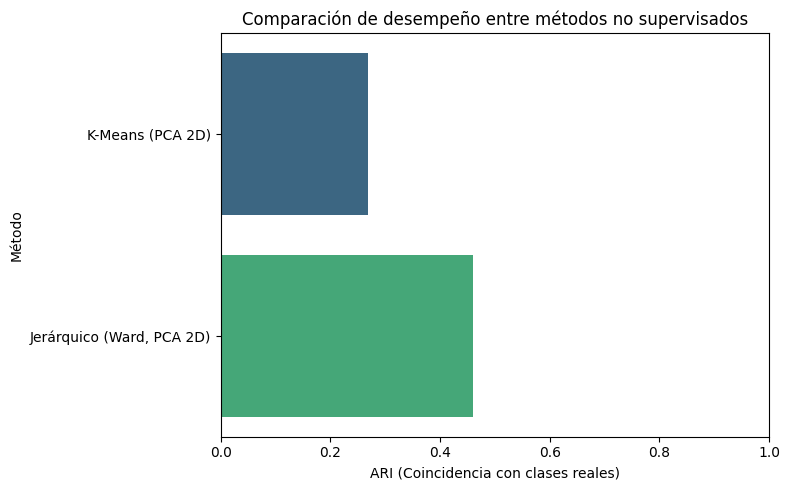

In [50]:
# Resultados obtenidos
resultados_clustering = pd.DataFrame({
    'Método': ['K-Means (PCA 2D)', 'Jerárquico (Ward, PCA 2D)'],
    'Adjusted Rand Index (ARI)': [0.2686, 0.4595],
    'Silhouette Score': [0.4737, 0.2643]
})

display(resultados_clustering)

# Visualización comparativa
plt.figure(figsize=(8,5))
sns.barplot(data=resultados_clustering, x='Adjusted Rand Index (ARI)', y='Método', palette='viridis')
plt.title('Comparación de desempeño entre métodos no supervisados')
plt.xlabel('ARI (Coincidencia con clases reales)')
plt.ylabel('Método')
plt.xlim(0,1)
plt.tight_layout()
plt.show()

En el análisis no supervisado se aplicaron dos métodos complementarios sobre el espacio PCA reducido a dos dimensiones:

El K-Means mostró una estructura general reconocible con ARI = 0.27 y Silhouette = 0.47, indicando una coincidencia parcial con las clases reales.
Las actividades dinámicas se separaron con claridad, mientras que las estáticas mostraron cierta superposición.
Este comportamiento es esperable dado que K-Means asume clusters esféricos y de tamaño similar, lo cual no refleja la continuidad natural del movimiento.

El Clustering Jerárquico (Ward) obtuvo una mejor correspondencia (ARI = 0.46), aunque con un Silhouette más bajo (0.26), reflejando menor cohesión interna pero una organización más coherente entre grupos.
En el dendrograma se observó que las actividades estáticas se agrupan entre sí y las dinámicas se separan gradualmente, mostrando una estructura progresiva y fisiológicamente interpretativa.

En conjunto, ambos métodos confirman que el dataset presenta una estructura latente jerárquica, donde las actividades humanas no se distribuyen de manera aleatoria, sino siguiendo patrones de similitud biomecánica entre posturas y movimientos.

## Conclusiones finales

Los experimentos realizados demuestran que es posible clasificar con alta precisión distintas actividades humanas utilizando datos de sensores inerciales (acelerómetro y giroscopio) mediante modelos de aprendizaje automático.  

Entre los algoritmos evaluados, el SVM y el Random Forest se destacaron por su equilibrio entre rendimiento y generalización, mientras que el MLP mostró un gran potencial de mejora mediante optimización de hiperparámetros.  
El **Árbol de Decisión** cumplió un rol fundamental como modelo interpretativo y base para el resto de los métodos.

### Aplicaciones potenciales

El enfoque desarrollado tiene un **alto potencial de aplicación** en los ámbitos biomédico y deportivo, incluyendo:

- Monitoreo del entrenamiento y estimación del gasto energético.  
- Detección automática de posturas, movimientos o caídas.  
- Seguimiento de la evolución en programas de rehabilitación o fisioterapia.  
- Integración en dispositivos *wearables* o sistemas IoT de salud.


En conclusión, las técnicas de aprendizaje automático aplicadas a señales biométricas constituyen una herramienta poderosa para el reconocimiento de actividades humanas, abriendo el camino hacia sistemas inteligentes de monitoreo, prevención y rehabilitación personalizada.
